In [1]:
"""This experiment demonstrates the ROC curves plotted between 4 algorithms like 
Logistic regression, SVM, Naive Bayes and Decision trees. The dataset used is
Titanic dataset from kaggle.

Contributors: Vamsee and Smrithi
"""

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

In [5]:
train = train.fillna({"Embarked": "S"})

In [6]:
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())

In [7]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [8]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [9]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [10]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [11]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [12]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [13]:
train = train.drop(['PassengerId'], axis = 1)

In [14]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis=1)
y = train["Survived"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [16]:
log_model = LogisticRegression()
nb_model = GaussianNB()
svc_model = SVC()
des_model = DecisionTreeClassifier(criterion="entropy")

In [17]:
models = [
    {
        'label': 'Logistic Regression',
        'model': log_model
    },
    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
    {
        'label': 'Support Vector Machine',
        'model': svc_model
    },
    {
        'label': 'Decision Tree Classification',
        'model': des_model
    }
]

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

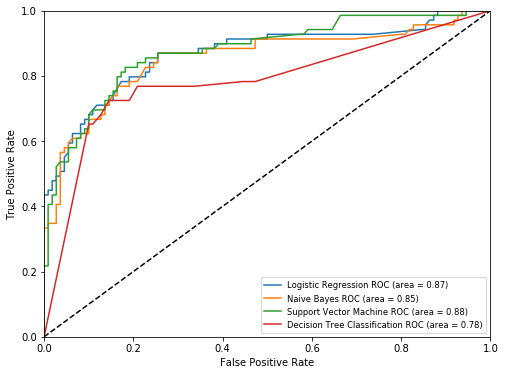

In [19]:
plt.clf()
plt.figure(figsize=(8,6))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(xtrain,ytrain).predict_proba(xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()